In [1]:
import numpy as np
import os
import utils
import matplotlib.pyplot as plt
import dijkstra
import a_star
import bfs
import greedy
from matplotlib.animation import FuncAnimation, PillowWriter, ArtistAnimation

def test_algorithm(planner, start, goal, ax, grid_map, title):
  
  # Check if the planner is a costmap planner( inherits from Dijkstra)
  if issubclass(type(planner), dijkstra.Dijkstra):
    utils.plot_costmap(planner.costmap, title, ax)
  else:
    utils.plot_gridmap(grid_map, title, ax)
  path = planner.plan(start, goal)
  ax.plot([start[1] + 0.5], [grid_map.shape[0] - start[0] - 0.5], 'go', markersize=10)
  ax.plot([goal[1] + 0.5], [grid_map.shape[0] - goal[0] - 0.5], 'ro', markersize=10)
  if path is not None:
    ax.plot([x[1] + 0.5 for x in path],
            [grid_map.shape[0] - x[0] - 0.5 for x in path],
            color="blue",linewidth=2)
  return path
def compare_motion(planner_class, start, goal, grid_map):
  fig, axes = plt.subplots(1, 2, figsize=(12,6))
  fig.suptitle(f'Comparing 4 and 8 connectivity for {planner_class.__name__}')
  ax = axes[0]
  ax2 = axes[1]
  planner1 = planner_class(grid_map, utils.Movements4Connectivity())
  planner2 = planner_class(grid_map, utils.Movements8Connectivity())
  path1 = test_algorithm(planner1, start, goal, ax, grid_map, 'planner 4')
  path2 = test_algorithm(planner2, start, goal, ax2, grid_map, 'planner 8')
  plt.show()

def compare_algorithms(start, goal, grid_map, movements):
  fig, axes = plt.subplots(2, 2, figsize=(12,12))
  fig.suptitle(f'Comparing algorithms on the same map with {movements.__class__.__name__}')
  algorithms = [bfs.BFS, dijkstra.Dijkstra, greedy.Greedy, a_star.AStar]
  path_list = []
  for i, planner_class in enumerate(algorithms):
    ax = axes[i//axes.shape[1], i%axes.shape[1]]
    planner = planner_class(grid_map, movements)
    path = test_algorithm(planner, start, goal, ax, grid_map, planner_class.__name__)
    path_list.append(path)
  
  for i, path in enumerate(path_list):
    if path is not None:
      print(f'{algorithms[i].__name__} path length: {len(path)}')
      if planner_class is not bfs.BFS or planner_class is not greedy.Greedy:
        utils.plot_costmap(planner.costmap, algorithms[i].__name__, axes[i//axes.shape[1], i%axes.shape[1]])
      else:
        utils.plot_gridmap(grid_map, algorithms[i].__name__, axes[i//axes.shape[1], i%axes.shape[1]])
        print(f'{algorithms[i].__name__} path cost: {planner.costmap[path[-1][0], path[-1][1]]}')
      axes[i//axes.shape[1], i%axes.shape[1]].set_title(f'{algorithms[i].__name__}')
      axes[i//axes.shape[1], i%axes.shape[1]].plot([x[1] + 0.5 for x in path],
            [grid_map.shape[0] - x[0] - 0.5 for x in path],
            color="blue",linewidth=2)

  
  # plt.show()


In [2]:
relative_path = "../2D_maps/map1.png"
print("Testing dijkstra on map1.png")
print("current directory: ", os.getcwd())
curr_dir = os.getcwd()
                            
map_path = os.path.join(curr_dir, relative_path)

xy_reso = 3
_, grid_map, _ = utils.get_map(map_path, xy_reso)
start = np.array([20, 0])
goal = np.array([0, 20])


Testing dijkstra on map1.png
current directory:  /home/andrea/planning_control_methodss/Path_Planners
Map path is a string
Map path: /home/andrea/planning_control_methodss/Path_Planners/../2D_maps/map1.png
map path type: <class 'pathlib.PosixPath'>
Map size: (64, 64)
Grid Map size: (22, 22)


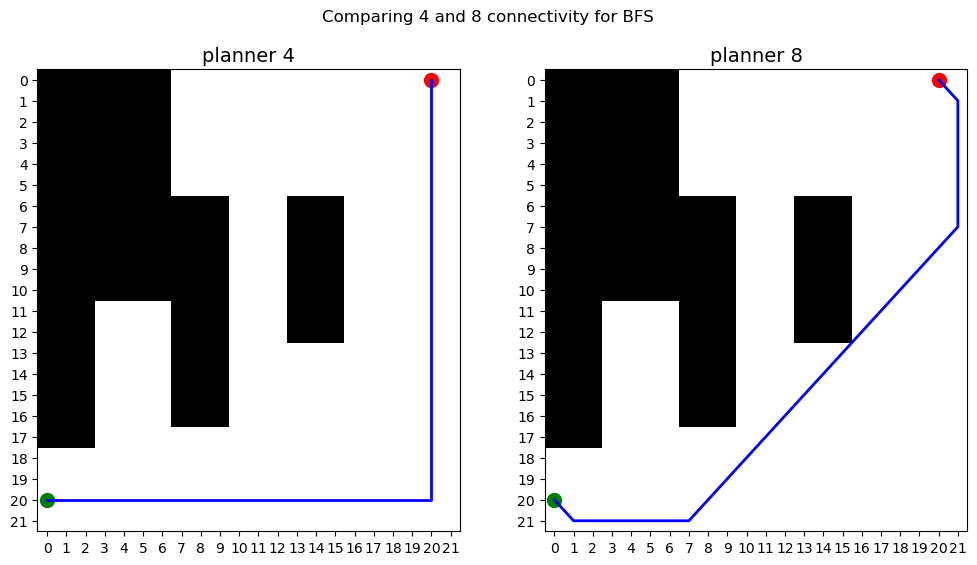

In [3]:
compare_motion(bfs.BFS, start, goal, grid_map)

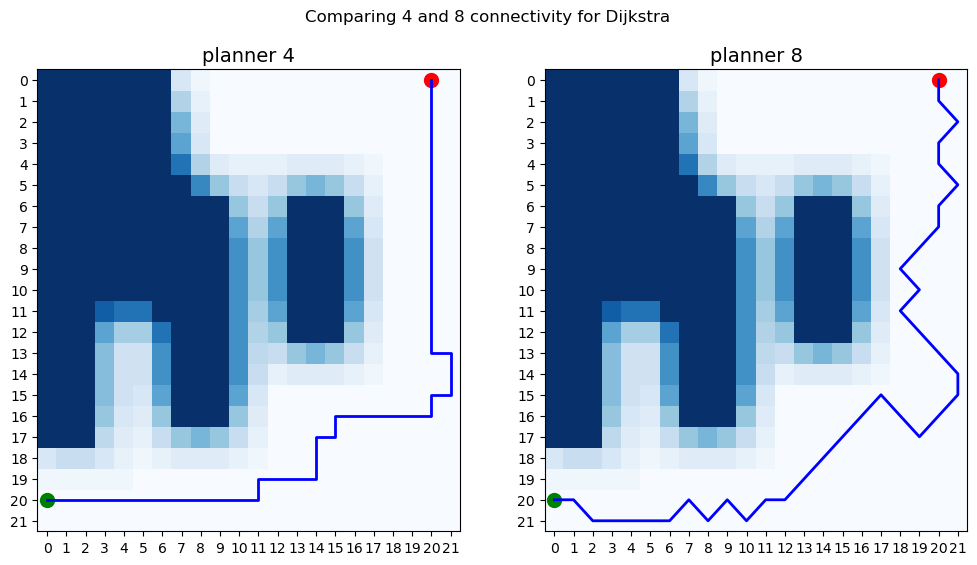

In [4]:
compare_motion(dijkstra.Dijkstra, start, goal, grid_map)

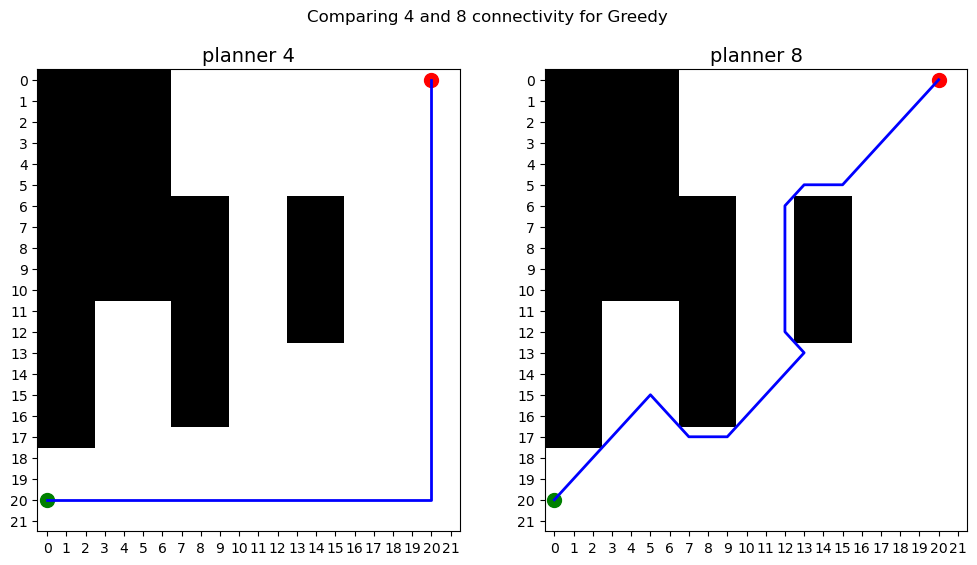

In [5]:
compare_motion(greedy.Greedy, start, goal, grid_map)

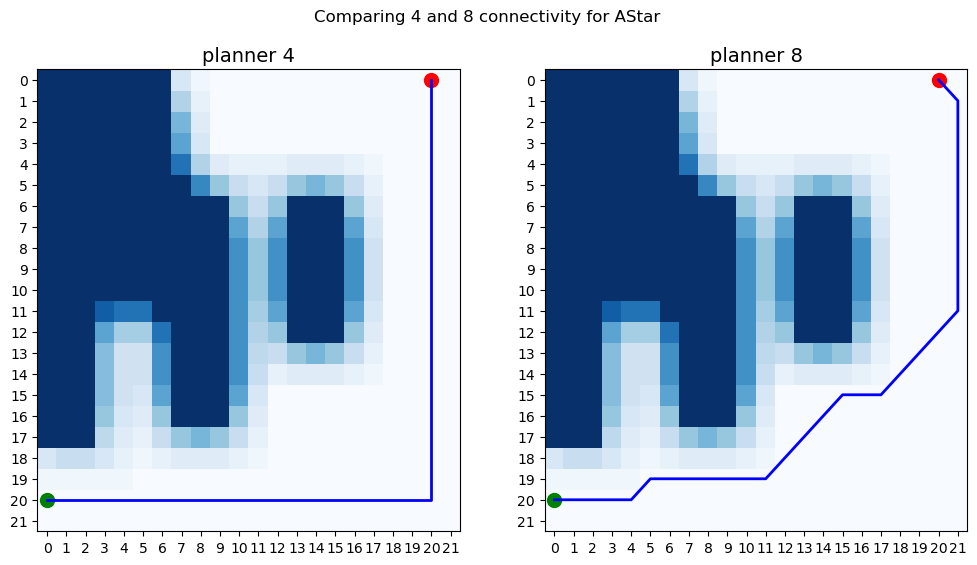

In [6]:
compare_motion(a_star.AStar, start, goal, grid_map)

BFS path length: 41
Dijkstra path length: 43
Greedy path length: 41
AStar path length: 41


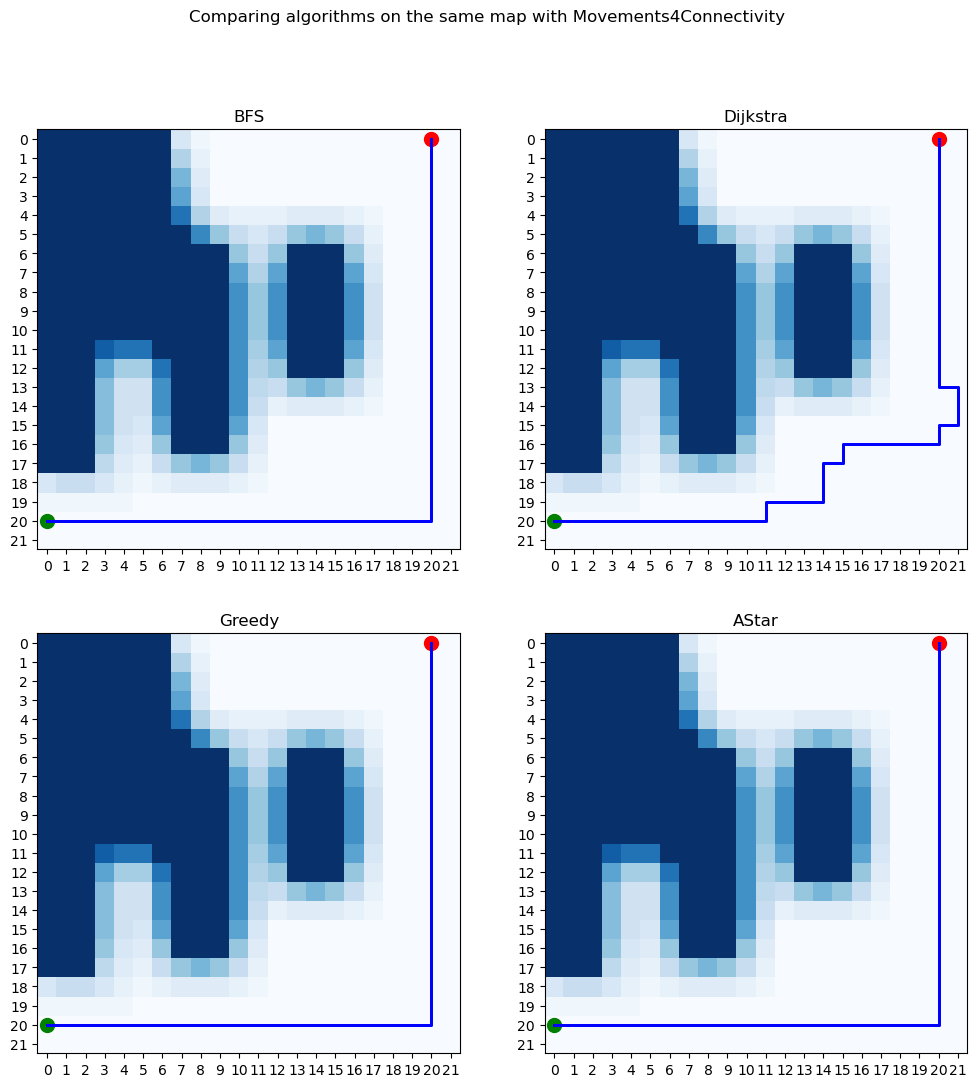

In [7]:
compare_algorithms(start, goal, grid_map, utils.Movements4Connectivity())

BFS path length: 29
Dijkstra path length: 37
Greedy path length: 29
AStar path length: 33


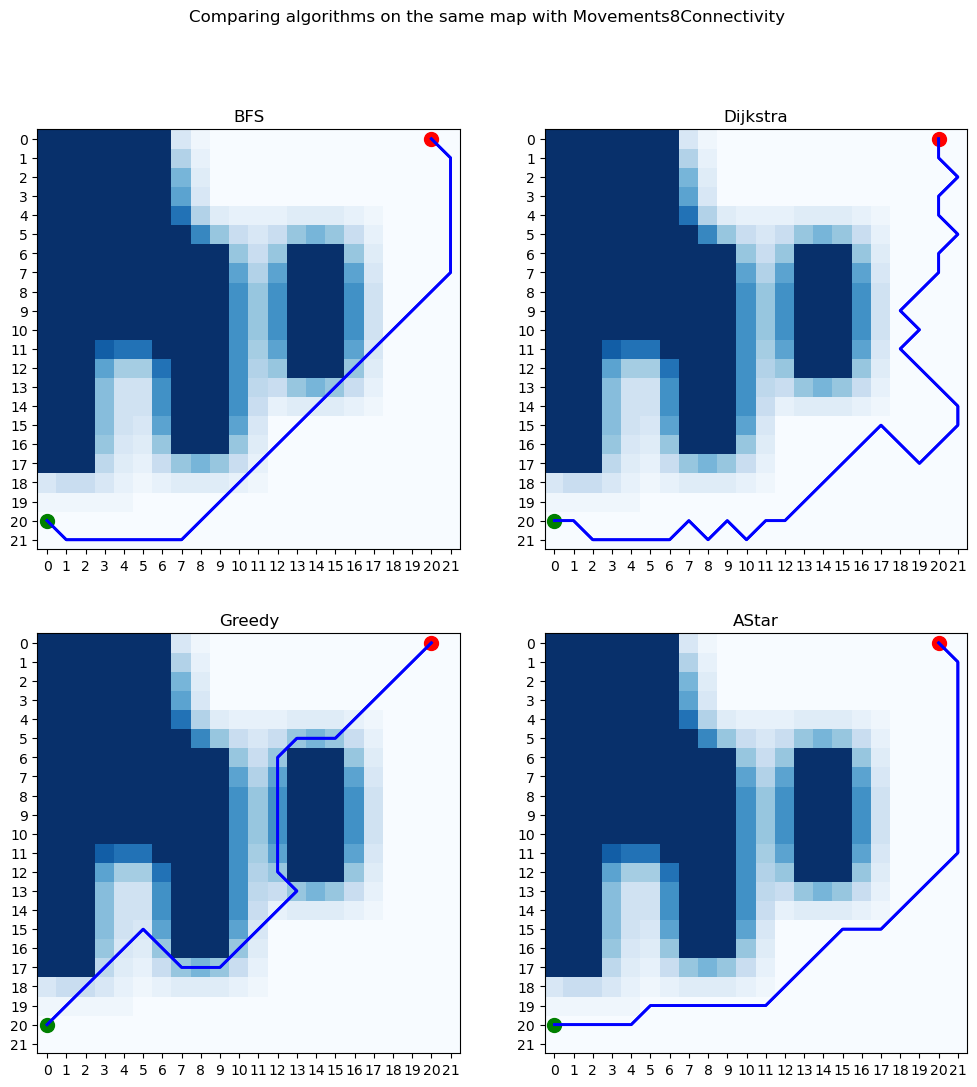

In [8]:
compare_algorithms(start, goal, grid_map, utils.Movements8Connectivity())